# 폰트설정

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pathlib import Path

In [18]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Nanum Pen'
print(mpl.rcParams['font.family'])
# 유니코드에서 음수 부호설정
mpl.rc('axes', unicode_minus=False)

NanumGothic
Nanum Pen
['Nanum Pen']


# Seaborn이란
- Matplotlib 을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지인다.
- 시각화 기능은 Matplotlib 패키지에 의존하며
- 통계 기능은 Statsmodels 패키지에 의존한다.

### 카운트 플롯
- countplot() 을 사용하면 각 카테고리 값마다의 데이터가 얼마나 있는지 표시할 수 있다.
- value_counts()를 보듯이 각 유니크한 값들이 몇개씩 있는지 시각적으로 확인 가능
- 카운트 플롯은 카테고리별 히스토그램이라 볼 수 있다. 
- API 옵션은 바차트와 동일(모양도 바차트와 동일)

#### 테마를 활용해서 스타일 적용하기
- set_theme()는 global 범위의 테마를 적용해서 그래프를 쉽게 꾸밀 수 있다.
- style과 palette 키워드 인수를 활용해서 그 값을 설정한다.
    - style = darkgrid, whitegrid, dark, white, ticks,...
    - palette = pastel, husl, spectral, flasre, ...
- set_context()의 인수로 paper, notebook, talk , poster 중 하나를 넣으면 해당하는 설정을 세팅할 수 있다.

In [19]:
import seaborn as sns
sns.set_theme(style = 'whitegrid')
sns.set_context('paper')

<AxesSubplot:xlabel='class', ylabel='count'>

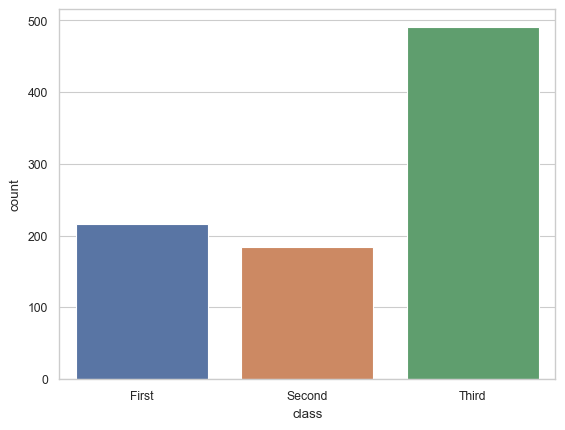

In [20]:
df = sns.load_dataset('titanic')
sns.countplot(x = df['class']) # x 키워드 인수에 Series 값을 전달한다.

- hue 키워드 인수를 활용해서 분류할 두 번째 변수를 설정할 수 있다.
- data 키워드 인수에 DataFrame을 전달하고, x 키워드 인수에 DataFrame 중 매칭하고 싶은 column의 name을 전달한다.

<AxesSubplot:xlabel='class', ylabel='count'>

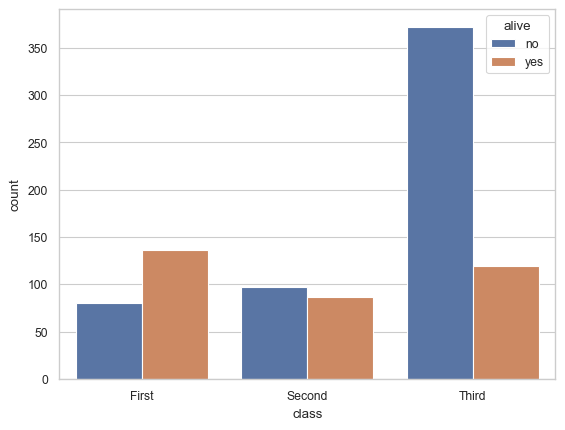

In [13]:
# groupby
sns.countplot(data = df , x = 'class',hue='alive') # data영역에 titanic 자체를 넣고 x 에 column 정보를 담아도 된다.
# alive column을 두 번째 변수로 지정하여 선실별 생존 여부를 가시적으로 확인할 수 있도록 돕는다.

- 플롯을 수평하게 작성할 수도 있다.
- y 키워드 인수에 data로 넘긴 DataFrame의 column name 값을 전달하면 된다.

<AxesSubplot:xlabel='count', ylabel='class'>

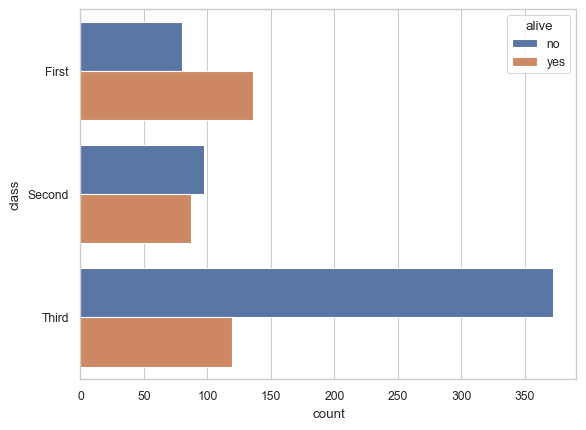

In [4]:
sns.countplot(data = df , y = 'class',hue='alive')

### tips 데이터셋

#### 각 column마다의 의미는 다음과 같습니다.
- total_bill: 총 지불 금액($)
- tip: 팁($)
- sex: 성별
- smoker: 흡연 여부
- day: 요일
- time: 식사 시간대
- size: 식사 인원

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### rugplot()
- 데이터 위치를 x 축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다
- 커널 밀도는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

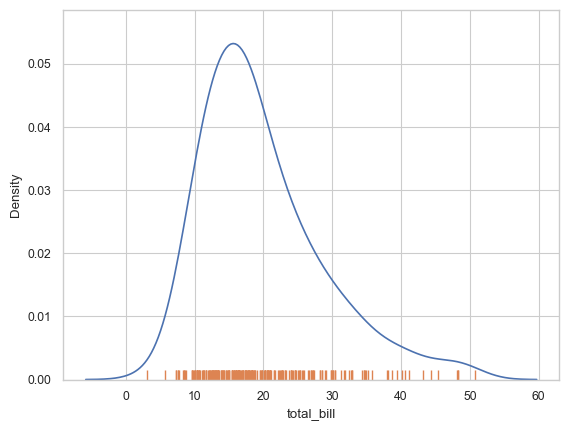

In [6]:
sns.kdeplot(data=tips,x='total_bill') # 위에 파란선 (밀도를 보기 유리함)
sns.rugplot(data=tips,x='total_bill') # 밑에 주황색점 (밀도를 볼 수 있음.)

- scatterplot을 사용해서 y에 tip에 대한 column name을 넣어주어서 전체 금액 대비 tip의 비용이 얼마인지 볼 수 있다.  
  (x,y를 부여해서 점형태로 분포를 볼 수 있다.)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

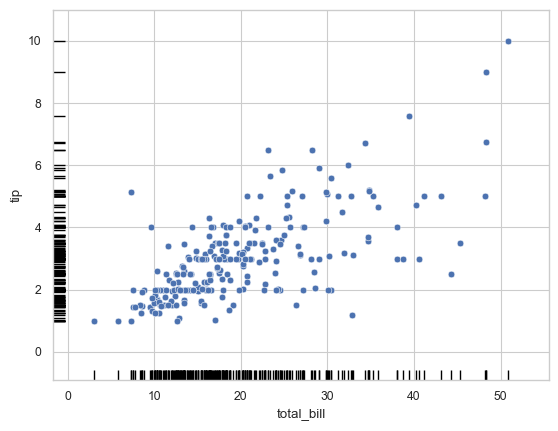

In [7]:
sns.scatterplot(data=tips,x='total_bill',y= 'tip')  # 점점 플롯
sns.rugplot(data=tips,x='total_bill', y = 'tip',color = 'black')   # 밑에 검정 분포

- hue 속성에 추가 값을(time column) 넣어서 식사시간 별로 추가 분류(색으로) 하여 가시적으로 보임

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

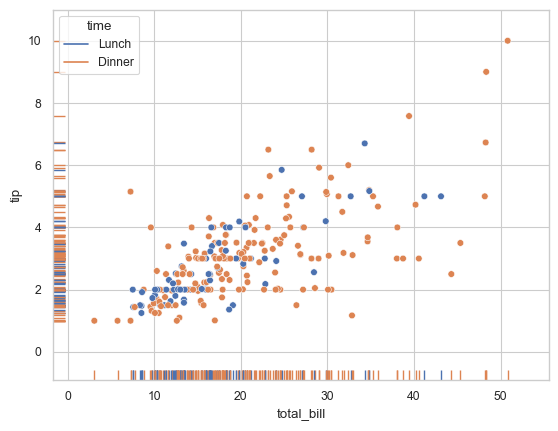

In [8]:
sns.scatterplot(data=tips,x='total_bill',y= 'tip', hue= 'time')  
sns.rugplot(data=tips,x='total_bill', y = 'tip',color = 'black', hue = 'time')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

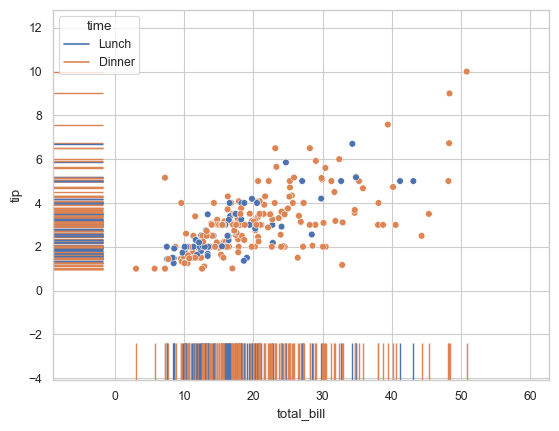

In [9]:
sns.scatterplot(data=tips,x='total_bill',y= 'tip', hue= 'time')  
sns.rugplot(data=tips,x='total_bill', y = 'tip',hue='time',height = .1) # rugplot의 크기를 조절하기 위해 height 키워드를 사용가능하다.

<AxesSubplot:xlabel='carat', ylabel='price'>

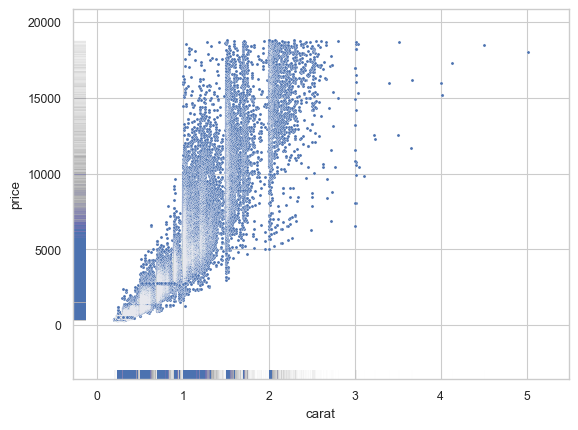

In [11]:
diamonds = sns.load_dataset('diamonds')
sns.scatterplot(data=diamonds, x = 'carat', y='price',s=5)
sns.rugplot(data=diamonds,x = 'carat',y = 'price', lw=1, alpha=.005)


### 히스토그램
- 1차원 혹은 2차원 데이터를 보는데 유용하다

#### penguins dataset
- 'Adelie', 'Chinstrap', 'Gentoo' 총 3 분류의 펭귄에 대한 데이터셋입니다.

- species: 펭귄의 종(Chinstrap, Adélie, Gentoo)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: 체중(g)
- island: 서식지 섬 (Dream, Torgersen, Biscoe) in
the Palmer Archipelago (Antarctica)
- sex: 펭귄 성별

In [3]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#### histplot() x축 기준
- x 키워드 인수로 columns label 값을 전달한다.
- 좌측 y축은 개수를 표현하고 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

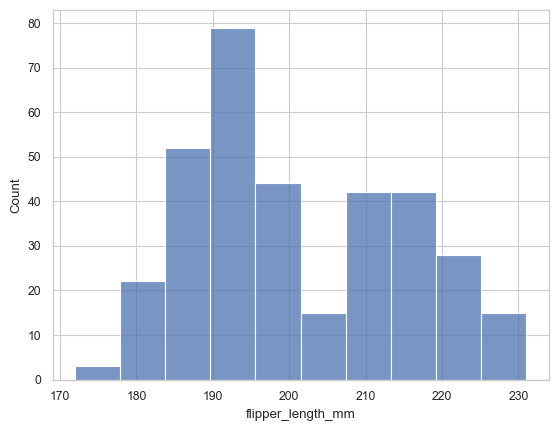

In [45]:
sns.histplot(data = penguins,x = 'flipper_length_mm') # 하지만 이정도 분류로는 파악이 어렵다.

#### histplot() y축 기준
- x 키워드 인수를 y 키워드 인수로 변경하여 표현 가능

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

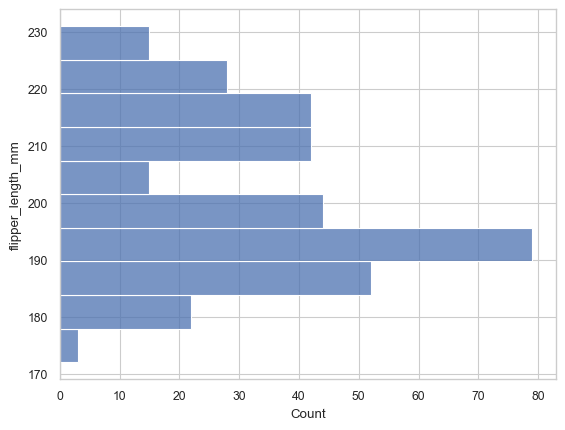

In [46]:
sns.histplot(data = penguins, y = 'flipper_length_mm')

#### histplot() bin 너비 지정하기
- binwidth 키워드 인수를 사용해서 bin의 너비를 지정할 수 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

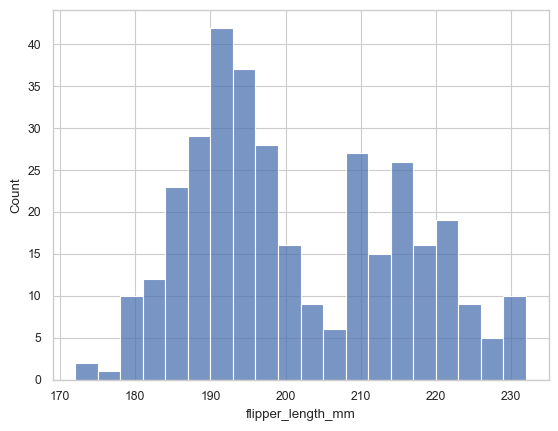

In [47]:
sns.histplot(data = penguins,x = 'flipper_length_mm',binwidth=3) # x축의 너비를 3씩나눔

#### histplot() bin 개수 지정하기
- bins 키워드 인수를 사용해서 bin의 개수(막대의 개수)를 지정할 수도 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

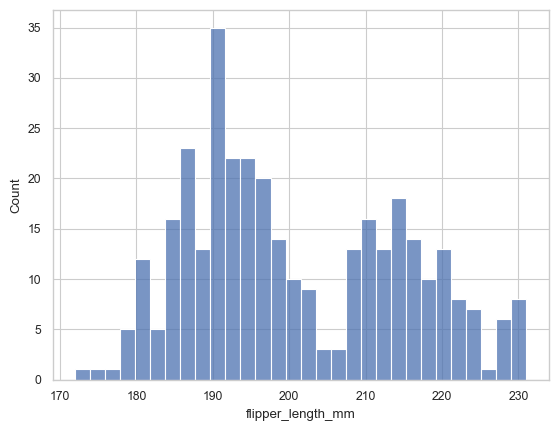

In [50]:
sns.histplot(data = penguins,x = 'flipper_length_mm',bins = 30)

#### histplot() kde(kernal density) 를 동시에 표시하기
- kde 키워드 인수를 True로 바꿔줌으로써 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여준다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

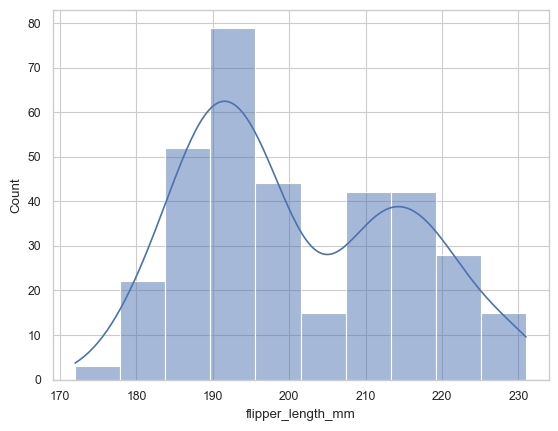

In [51]:
sns.histplot(data=penguins,x = 'flipper_length_mm',kde=True)

#### histplot() hue 키워드 인수로 데이터 분리하기
- hue 키워드 인수에 분류 기준이 될 column label을 전달해서 여러 개의 히스토그램을 합친것과 같은 결과의 그래프를 얻을 수 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

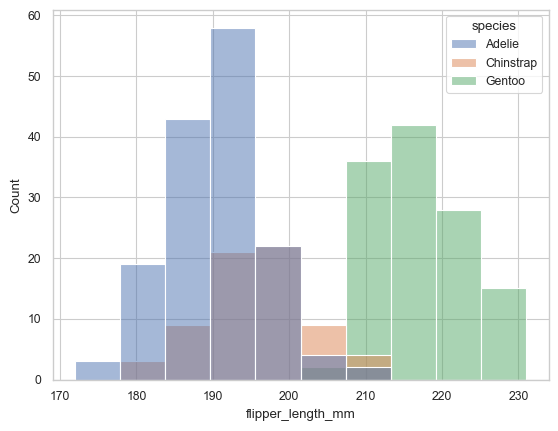

In [52]:
sns.histplot(data=penguins,x = 'flipper_length_mm',hue='species') # 좀 더 보기 명확해졌다.

#### histplot() 다양한 표현법 stack
- 각 히스토그램의 layer가 겹친다면 이를 누적하듯 표현하는 방법도 있다

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

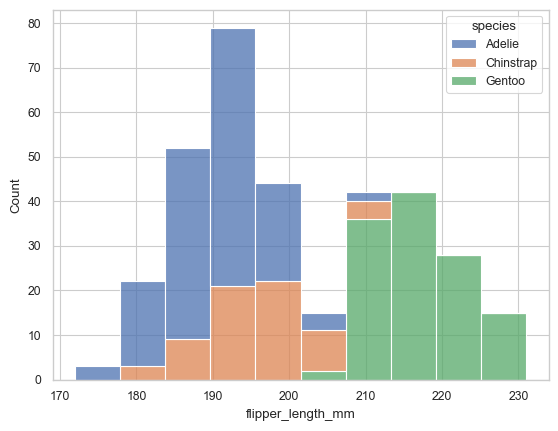

In [53]:
sns.histplot(data=penguins,x = 'flipper_length_mm',hue='species',multiple = 'stack')

#### histplot() 다양한 표현법 step
- 오버래핑된 결과가 보기 힘들 때 해결방법 중 하나이다.
- elements 키워드 인수에 'step'이란 값을 전달하여 shape에 치중하여 더 잘 보이도록 할 수 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

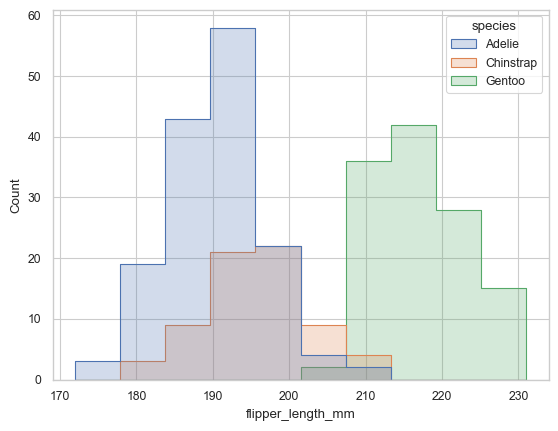

In [54]:
sns.histplot(data=penguins,x = 'flipper_length_mm',hue='species',element = 'step')

#### histplot() 다양한 표현법 poly
- element 인자에 'poly' 값을 전달하면 더 눈에 잘 다각형 모양으로 변경된다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

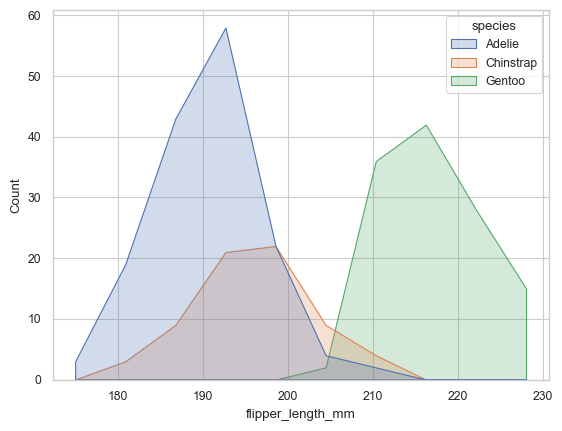

In [55]:
sns.histplot(data=penguins,x = 'flipper_length_mm',hue='species',element= 'poly')

#### heatmap
- x,y 축에 모두 column을 할당할경우 만들어지는 형태이다.

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

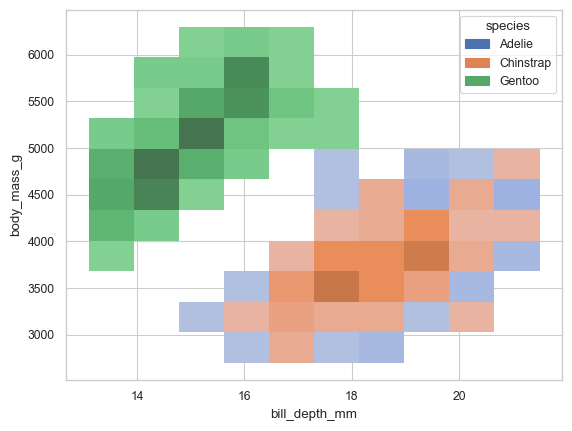

In [59]:
sns.histplot(data=penguins,x = 'bill_depth_mm',y= 'body_mass_g',hue='species') # 진할수록 데이터가 더 겹친다는 의미.

- x,y 축 모두 column을 할당할 때 그 중 하나의 값이 이산된 값이라면 아래와 같이 데이터를 시각화하여 표현하면 훨씬 이해하기 좋다.

<AxesSubplot:xlabel='bill_depth_mm', ylabel='species'>

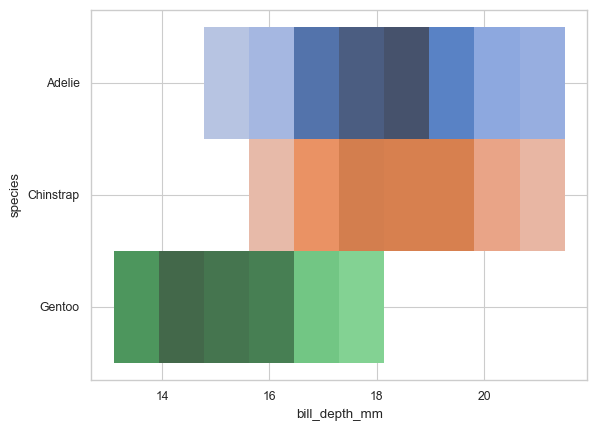

In [60]:
sns.histplot(data=penguins,x = 'bill_depth_mm',y= 'species',hue='species',legend = False)  # 

#### displot()
- 1,2차원 데이터의 분포를 히스토그램으로 보여준다.
- 다만 rug와 kde에 대해 동시에 표현이 가능해서 표현 범위가 더 넓고 더 많이 사용된다.

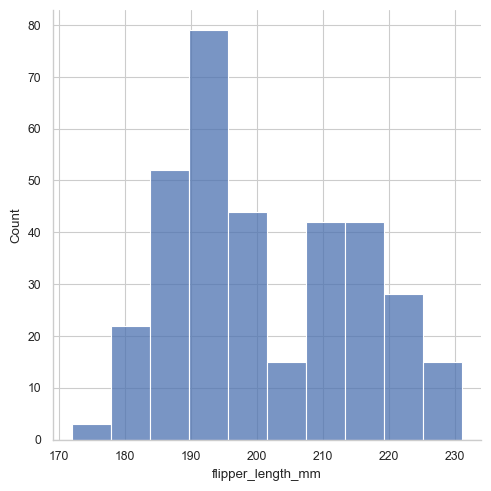

In [61]:
sns.displot(data=penguins, x = 'flipper_length_mm') # histplot()과 동일한 인수와 그래프 모양을 보인다.

##### displot() kde로 표현하기
- kind 키워드 인수를 활용해서 히스토그램 종류를 kde로 변경 가능하다.(부드러운 곡선형태)

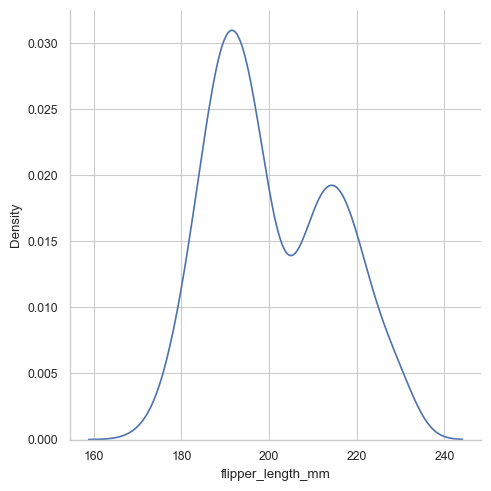

In [63]:
sns.displot(data=penguins, x = 'flipper_length_mm',kind= 'kde')

##### displot() ecdf로 표현하기
- kind 키워드 인수에 ecdf 를 활용해서 누적 분포 그래프로 표현 가능하다.

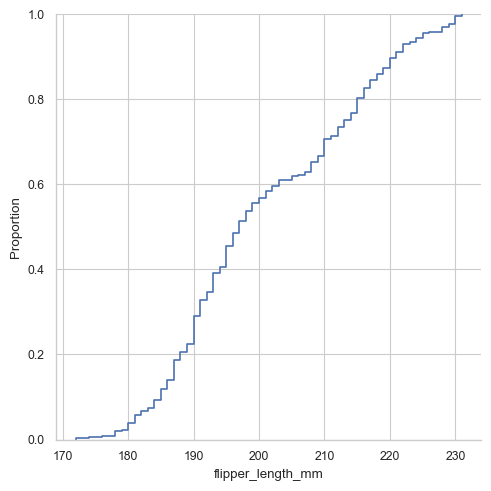

In [64]:
sns.displot(data=penguins, x = 'flipper_length_mm',kind= 'ecdf')

##### displot() 히스토그램과 kde 동시에 표현하기
- kde 키워드 인수 값을 True 로 전달하면 히스토그램와 kde를 동시에 표현 가능하다.

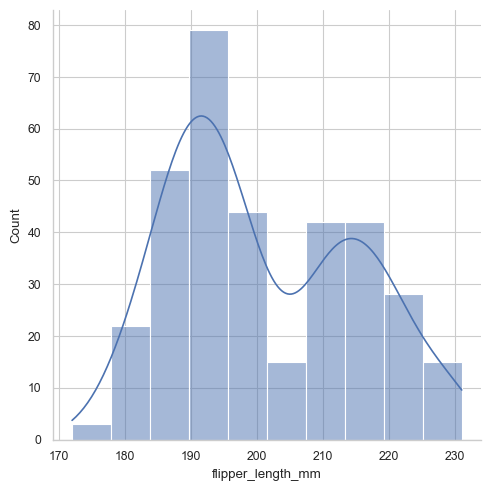

In [65]:
sns.displot(data=penguins, x = 'flipper_length_mm',kde = True)

##### displot() x, y 모두 값 할당하기
- x,y에 각각 값을 할당하여 히트맵 형태로 그래프를 출력할 수 있다.

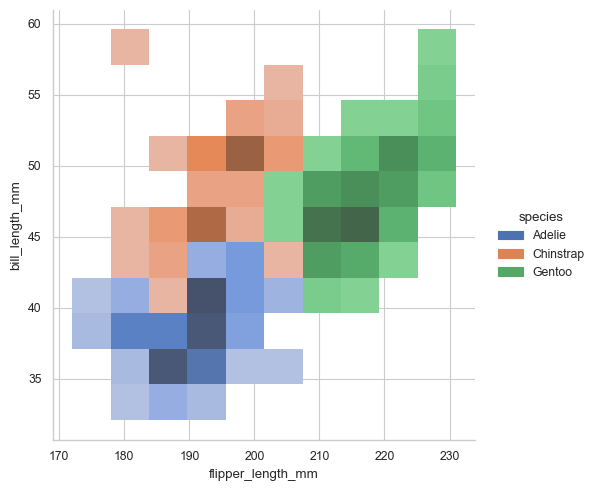

In [67]:
sns.displot(data=penguins, x = 'flipper_length_mm',y = 'bill_length_mm',hue = 'species')

##### displot() 2개 값을 kde로 표현하기
- x,y축 모두 할당한 앞의 히스토그램을 kde로도 표현 가능하다.
- 또한 rug = True 키워드 인수를 전달해서 rug에 대한 표현도 동시에 가능하다.

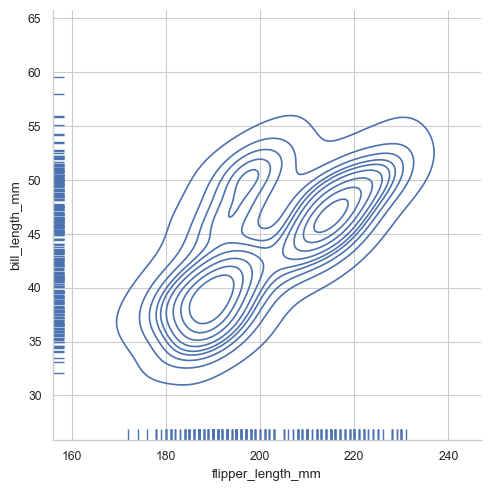

In [69]:
sns.displot(data=penguins, x = 'flipper_length_mm',y = 'bill_length_mm',kind = 'kde',rug=True)